In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.vision import *

In [10]:
df = pd.read_csv('deteriorated/data.csv')
df.head()

,image,contrasts,brightness
0,44230074980_ce62ac6c97_b.jpg,0.901116,0.598837
1,20763873738_c4c71b6443_b.jpg,1.040834,0.794685
2,32257580508_3ccce567b3_b.jpg,0.753340,0.551844
3,45385391381_6b3e9d08b9_b.jpg,1.009208,0.255583
4,45800930441_8df1c42d14_b.jpg,2.314621,0.556731


In [59]:
tfms = get_transforms()

data = (ImageItemList.from_df(df, path='deteriorated')
        .random_split_by_pct()
        .label_from_df(cols=[1,2])
        .transform(tfms, size=128)
        .databunch())

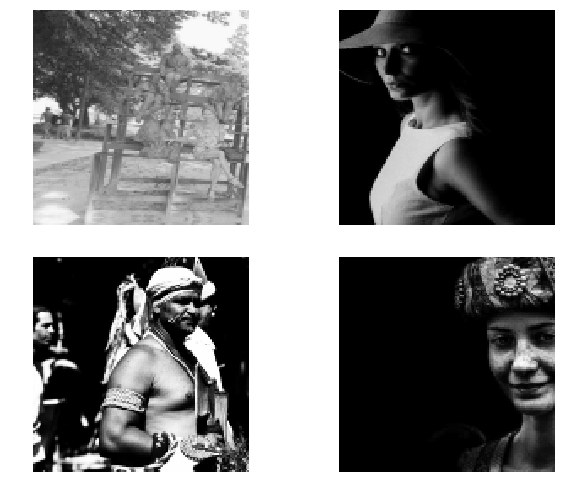

In [60]:
data.show_batch(rows=2, figsize=(9,7))

In [61]:
learn2 = create_cnn(data, models.resnet34, metrics=root_mean_squared_error)
learn2.fit_one_cycle(1)

epoch,train_loss,valid_loss,root_mean_squared_error
1,-12.145706,-16.244062,31.412413


In [32]:
learn.unfreeze()
learn.fit_one_cycle(1, slice(1e-5,3e-4), pct_start=0.05)

epoch,train_loss,valid_loss,root_mean_squared_error
1,0.432450,0.216216,0.925843
2,0.332005,0.188929,0.911441
3,0.280340,0.173247,0.926194
4,0.250680,0.160586,0.935237
5,0.228674,0.159451,0.926279
6,0.222009,0.160171,0.925083


In [35]:
pred = learn.get_preds()

In [36]:
pred

[tensor([[2.3416],
         [2.2064],
         [2.1409],
         ...,
         [1.4438],
         [2.6511],
         [1.0798]]),
 tensor([2.4645, 1.9309, 2.5937,  ..., 0.9870, 2.8821, 0.9418])]

In [58]:
((pred[0].squeeze()-pred[1])**2).mean().sqrt()

tensor(0.4002)

In [62]:
pred2 = learn2.get_preds()

In [71]:
pred2[1]

tensor([[2.0988, 0.6061],
        [0.7626, 0.3194],
        [2.2877, 0.7738],
        ...,
        [0.6645, 0.6944],
        [0.7587, 0.7813],
        [2.3183, 0.7888]])